In [1]:
import scipy
import matplotlib.pyplot as plt
import numpy as np


1.7935590445841525


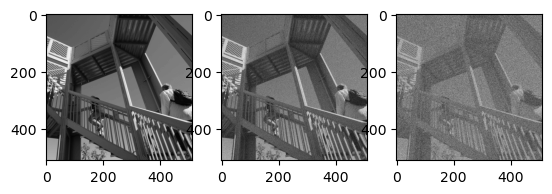

In [2]:
# Ejercicio 1
from scipy.stats import norm

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m / sd)


face = scipy.datasets.ascent().astype(float)  # INSTALAR POOCH!!! → se utiliza datasets para eliminar warning de ejecución
faceruido16 = face + norm.rvs(loc=0, scale=16, size=face.shape)
faceruido64 = face + norm.rvs(loc=0, scale=64, size=face.shape)
print(signaltonoise(face, axis=None))

plt.gray()  # se muestran las imágenes en escala de grises

# foto original, sin ruido
plt.subplot(131, aspect='equal')
plt.imshow(face)

# foto con ruido (varianza 16)
plt.subplot(132, aspect='equal')
plt.imshow(faceruido16)

# foto con ruido (varianza 64)
plt.subplot(133, aspect='equal')
plt.imshow(faceruido64)

plt.show()


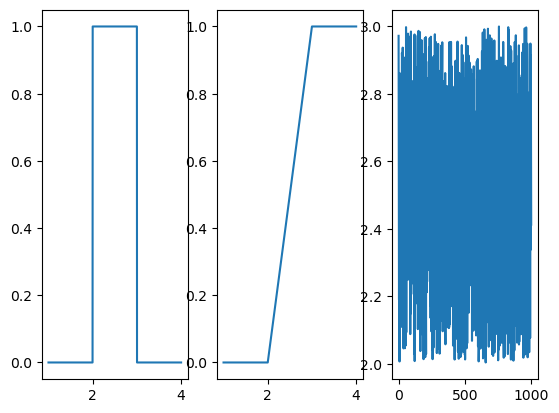

In [3]:
# Ejercicio 2
from scipy.stats import uniform

x = np.linspace(1, 4, 1000)

# Función de densidad
plt.subplot(131)
plt.plot(x, uniform.pdf(x, 2, 1))

# Función de distribución
plt.subplot(132)
plt.plot(x, uniform.cdf(x, 2, 1))

# Generador aleatorio
plt.subplot(133)
plt.plot(uniform.rvs(2, 1, size=1000))

plt.show()


13.32 22.47259664569273


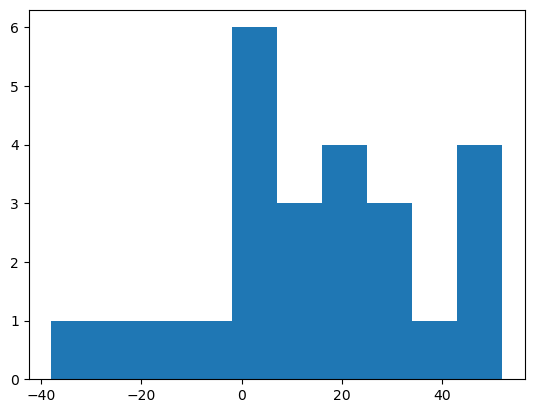

El p-valor es: 0.007531
Los tiempos son significativamente diferentes


/usr/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [4]:
# Ejercicio 3
from scipy.stats import wilcoxon

data = np.array([[113, 105, 130, 101, 138, 118, 87, 116, 75, 96,
                    122, 103, 116, 107, 118, 103, 111, 104, 111, 89, 78, 100, 89, 85, 88],
                    [137, 105, 133, 108, 115, 170, 103, 145, 78, 107,
                    84, 148, 147, 87, 166, 146, 123, 135, 112, 93, 76, 116, 78, 101, 123]])
dataDiff = data[1, :] - data[0, :]
print(dataDiff.mean(), dataDiff.std())
# Histograma
plt.hist(dataDiff)
plt.show()
# Test t
wilcoxon_stat, p_value = wilcoxon(dataDiff)
print("El p-valor es: %02f" % p_value)
if p_value < 0.05:
    print("Los tiempos son significativamente diferentes")
else:
    print("No hay evidencia para rechazar que sean iguales: los dos actuadores son indistintos")


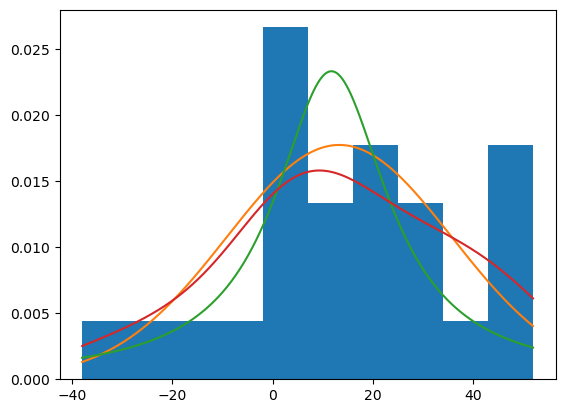

In [5]:
# Ejercicio 4
import scipy.stats as ss

data = np.array([[113, 105, 130, 101, 138, 118, 87, 116, 75, 96,
                    122, 103, 116, 107, 118, 103, 111, 104, 111, 89, 78, 100, 89, 85, 88],
                    [137, 105, 133, 108, 115, 170, 103, 145, 78, 107,
                    84, 148, 147, 87, 166, 146, 123, 135, 112, 93, 76, 116, 78, 101, 123]])
dataDiff = data[1, :] - data[0, :]

# Ajuste de una normal a los datos
mean, std = ss.norm.fit(dataDiff)
cauchy_mean, cauchy_std = ss.cauchy.fit(dataDiff)

plt.hist(dataDiff, density=1)
x = np.linspace(dataDiff.min(), dataDiff.max(), 1000)

pdf = ss.norm.pdf(x, mean, std)
kde = ss.gaussian_kde(dataDiff)
cauchy = ss.cauchy.pdf(x, cauchy_mean, cauchy_std)

plt.plot(x, pdf)
plt.plot(x, cauchy)
plt.plot(x, kde(x))
plt.show()


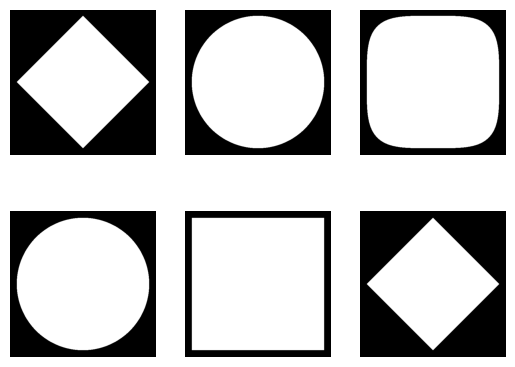

In [6]:
# Ejercicio 5
from scipy.spatial.distance import minkowski, euclidean, chebyshev, cityblock

Square = np.meshgrid(np.linspace(-1.1, 1.1, 512), np.linspace(-1.1, 1.1, 512), indexing='ij')
X = Square[0]
Y = Square[1]
f = lambda x, y, p: minkowski([x, y], [0.0, 0.0], p) <= 1.0
Ball = lambda p: np.vectorize(f)(X, Y, p)

plt.subplot(231, aspect='equal')
plt.imshow(Ball(1))
plt.axis('off')

plt.subplot(232, aspect='equal')
plt.imshow(Ball(2))
plt.axis('off')

plt.subplot(233, aspect='equal')
plt.imshow(Ball(4))
plt.axis('off')

# distancia euclídea
f = lambda x, y: euclidean([x, y], [0.0, 0.0]) <= 1.0
Ball = lambda: np.vectorize(f)(X, Y)

plt.subplot(234, aspect='equal')
plt.imshow(Ball())
plt.axis('off')

f = lambda x, y: chebyshev([x, y], [0.0, 0.0]) <= 1.0
Ball = lambda: np.vectorize(f)(X, Y)
plt.subplot(235, aspect='equal')
plt.imshow(Ball())
plt.axis('off')

f = lambda x, y: cityblock([x, y], [0.0, 0.0]) <= 1.0
Ball = lambda: np.vectorize(f)(X, Y)
plt.subplot(236, aspect='equal')
plt.imshow(Ball())
plt.axis('off')

plt.show()
